# Life Expectancy and GDP Portfolio Project

This project will include a standard data science approach to a pre-existing set of data. The goals of this project are:
1. Explore the broad data set:
    1. Plot the different countries' GDP and life expectancy over time
1. Compare the growth vs time:
    1. Which country has the highest growth over time?
    1. Which country has the largest change in life expectancy over time?
    1. Does continent have an effect on your growth?
    1. Explore negative rates - are there any negative rates in the data? How does that affect the other variable? 
1. Can we make any cool visualizations using some outside libraries? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
import math

# Using these as a starting point. pandas and numpy will allow for data manipulation, filtering, etc. Seaborn and matplotlib will allow for plotting and making charts. 
# Statsmodels will allow for performing statistical modeling of the data. Math... I don't actually know what that does

Let's start by loading in the data as a pandas dataframe (using pd). We'll load it in and inspect it to find out what's in the data set, what's missing, etc.

In [24]:
all_data = pd.read_csv('all_data.csv')
print(all_data.head(), '\n')
print(all_data.info(), '\n')
print(all_data.describe(), '\n')

# Clean the data up a little bit
# Make the headers lower case for ease of coding
all_data.columns = all_data.columns.str.lower()
print(all_data.columns)
# Make all the country column callouts lower case for ease of coding
all_data.country = all_data.country.str.lower()
# Rename the life exp column to something easier to code
all_data.rename(columns={'life expectancy at birth (years)':'life_exp'}, inplace=True)
countries = all_data.country.unique()
print(all_data.country.unique())

# for the sake of comparison we're going to look at the GDP deflator indicator presented by 

deflator_data = pd.read_csv('GDP_deflator.csv')
gdp_deflator = list(deflator_data.iloc[0, 1:17].astype(float))
gdp_deflator_cumulative = [1+(sum(gdp_deflator[:i])/100) for i in range(len(gdp_deflator))]
#gdp_deflator_cumulative = 1 + gdp_deflator_cumulative

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None 

              Year  Life expectancy at birth (years)           GD

So the data appears to be in pretty decent condition. There isn't that much of it to be honest. 6 different countries, SA, Asia, Europe, NA, Africa. Missing Australia/New Zealand, and no representation (obviously) from Antarctica. Let's start making some plots!

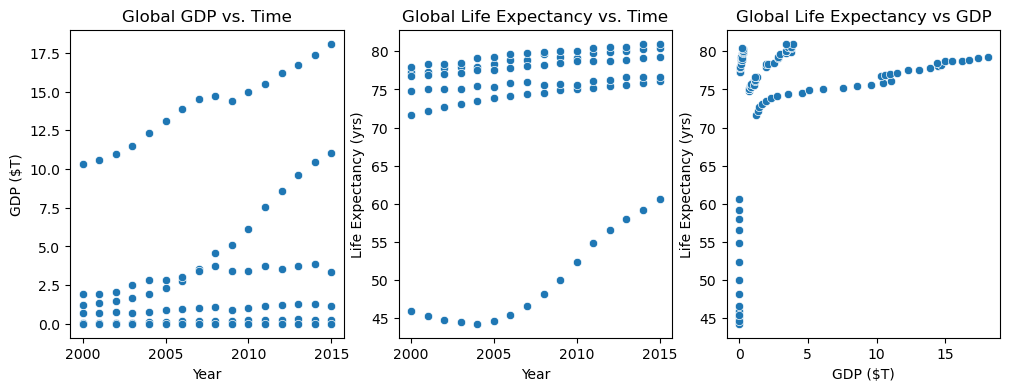

<Figure size 640x480 with 0 Axes>

In [35]:
# Let's plot worldwide GDP vs life expectancy on a scatterplot and view the correlation. This seemed like a good idea until I saw the plots the first time, realizing that since we're talking
# about very different scales here, our data isn't going to give us nice plots to calculate correlations between variables. 

# in order to get anything meaningful, we need to sum up all of the GDP numbers, and average all of the life expectancy numbers. We'll leave this out for now, stretch goal if we want to come back to it
global_gdp_trillions = all_data.gdp/1e12

fig, ax = plt.subplots(1,3, figsize=(12,4))
plt.sca(ax[0])
sns.scatterplot(x=all_data.year, y=global_gdp_trillions)
plt.xlabel('Year')
plt.ylabel('GDP ($T)')
plt.title ('Global GDP vs. Time')

#Life expectancy
plt.sca(ax[1])
sns.scatterplot(data = all_data, x='year', y='life_exp')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (yrs)')
plt.subplots_adjust(wspace=0.2)
plt.title('Global Life Expectancy vs. Time')

# GDP vs life expectancy
plt.sca(ax[2])
sns.scatterplot(data = all_data, x=global_gdp_trillions, y='life_exp')
plt.xlabel('GDP ($T)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Global Life Expectancy vs GDP')

plt.show()
plt.clf()

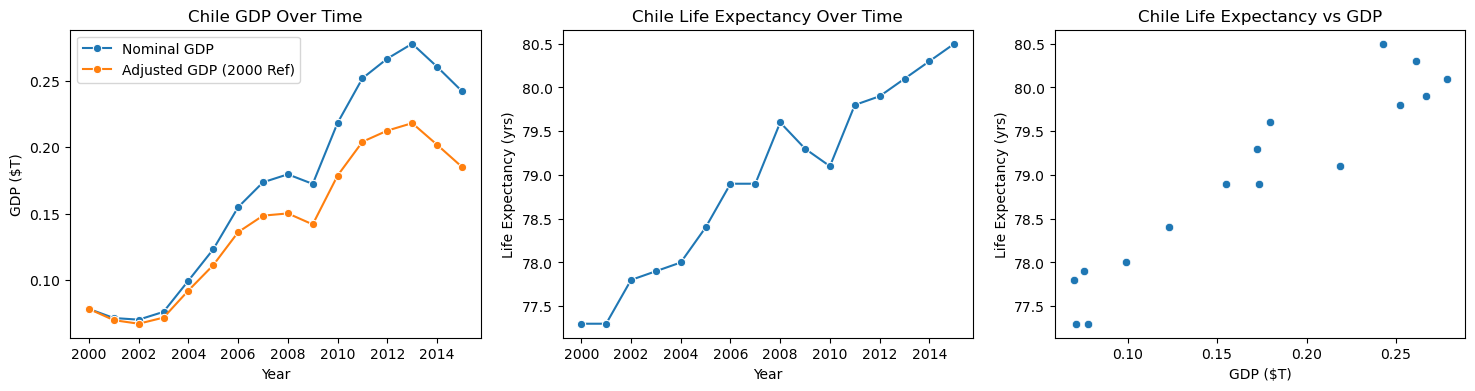

<Figure size 640x480 with 0 Axes>

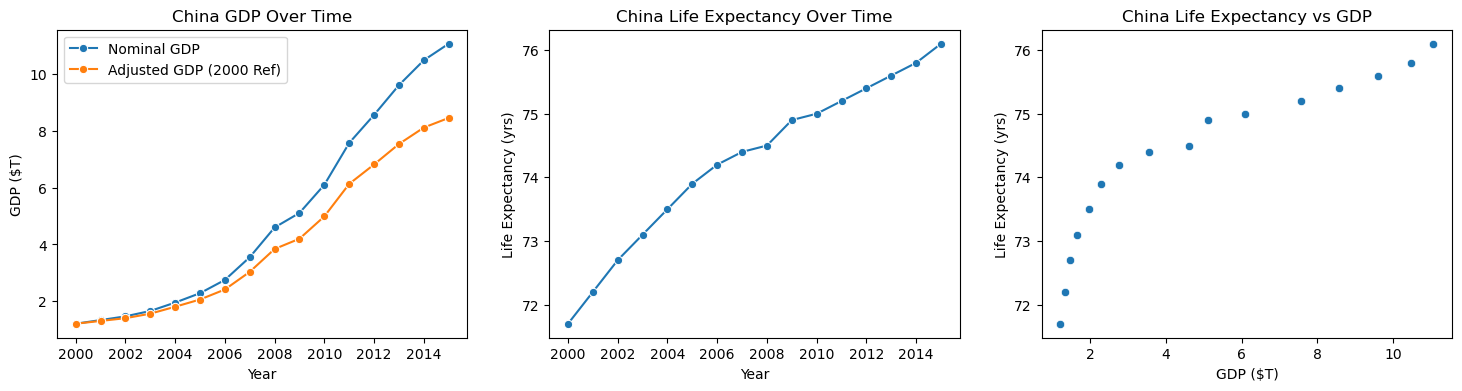

<Figure size 640x480 with 0 Axes>

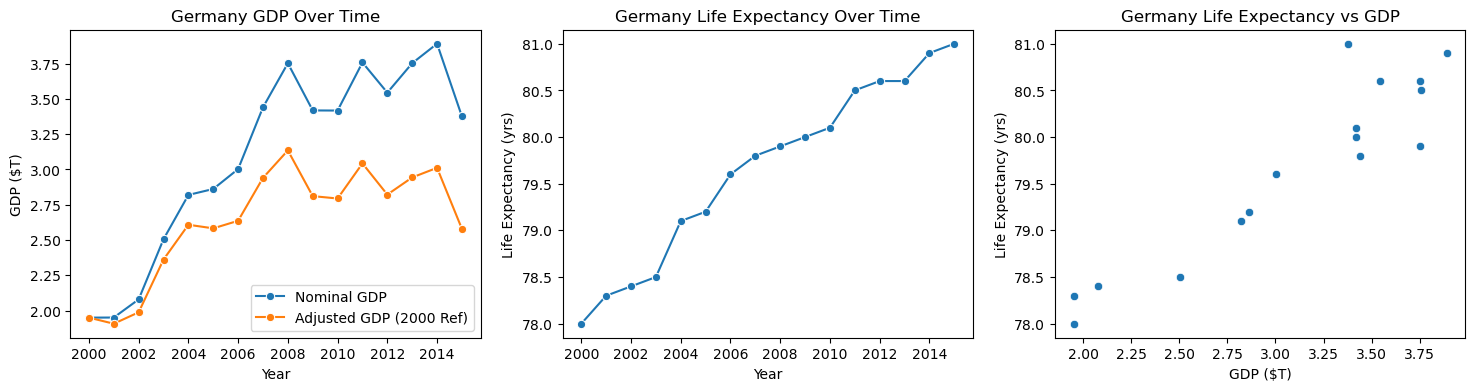

<Figure size 640x480 with 0 Axes>

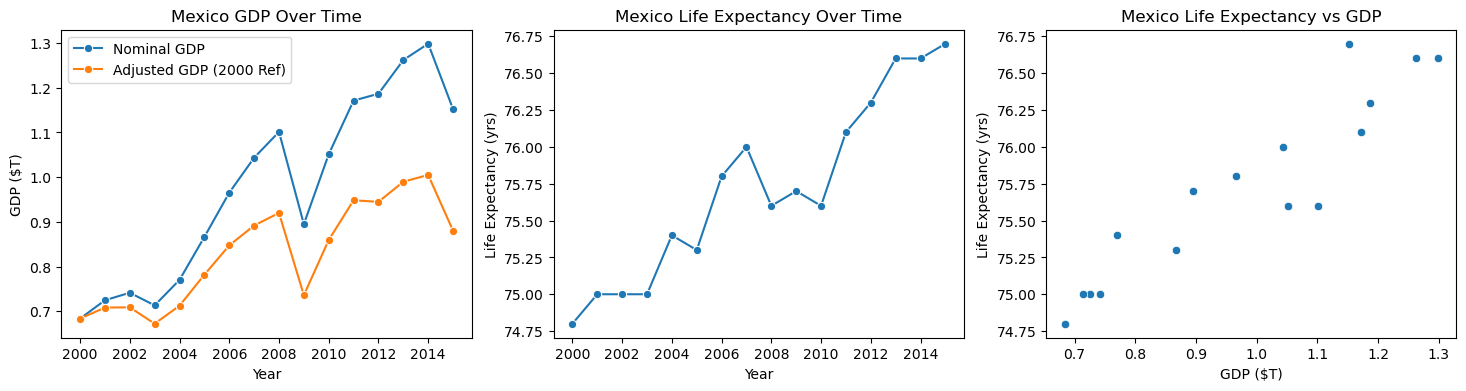

<Figure size 640x480 with 0 Axes>

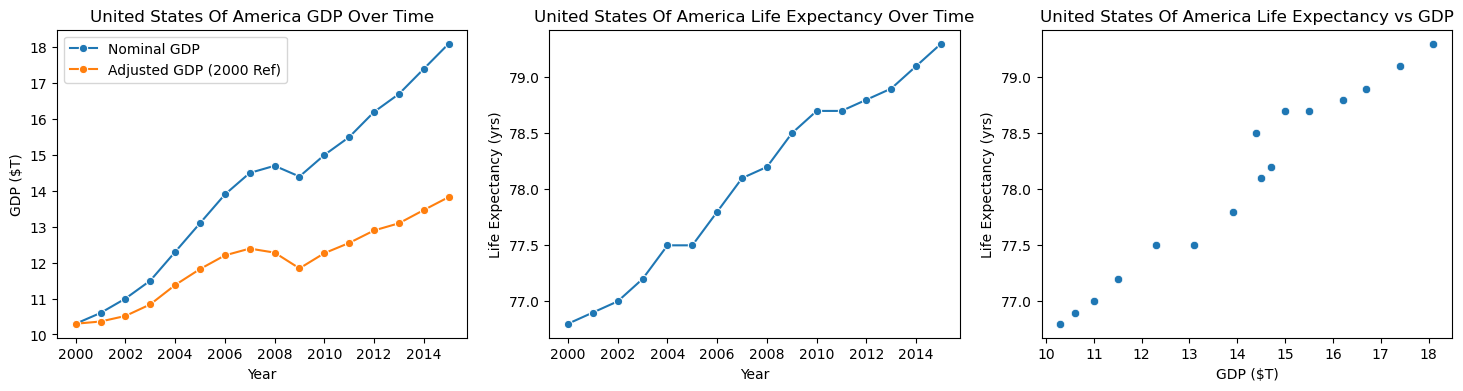

<Figure size 640x480 with 0 Axes>

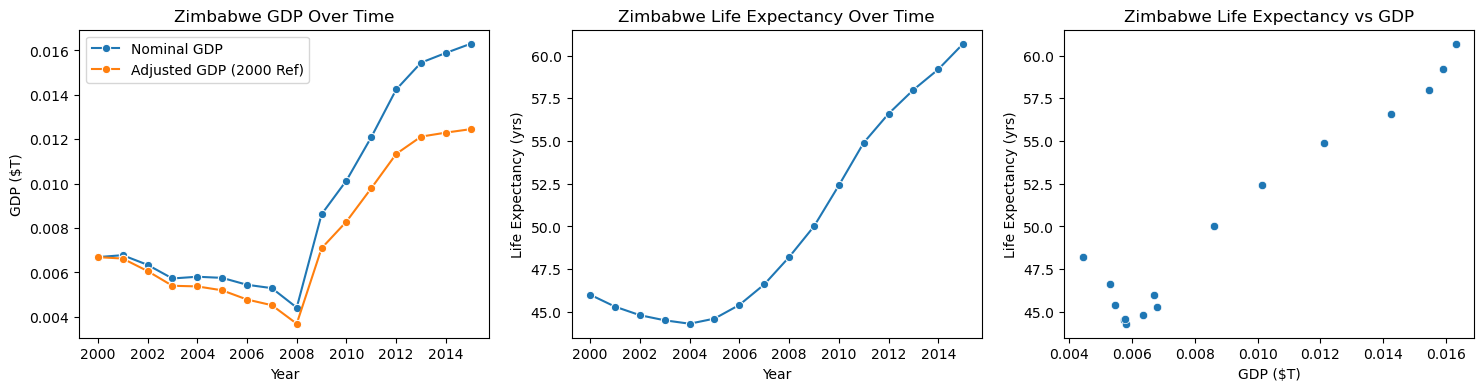

<Figure size 640x480 with 0 Axes>

In [41]:
# Now let's break it down by country
for country in countries:
    gdp_trillions = all_data[all_data['country']==country].gdp/1e12
    gdp_adjusted = gdp_trillions/gdp_deflator_cumulative
    # GDP over time
    plt.figure(figsize=(18,4))
    plt.subplot(1,3,1)
    sns.lineplot(data = all_data[all_data.country==country], x='year', y=gdp_trillions, marker='o', dashes=False, label ='Nominal GDP')
    sns.lineplot(data = all_data[all_data.country==country], x='year', y=gdp_adjusted, marker='o', dashes=False, label='Adjusted GDP (2000 Ref)')
    plt.xlabel('Year')
    plt.ylabel('GDP ($T)')
    plt.title('{country} GDP Over Time'.format(country=country.title()))
    plt.legend()
    #plt.legend(['Nominal GDP', 'Adjusted GDP (2000 Ref)'])
    # Life expectancy over time
    plt.subplot(1,3,2)
    sns.lineplot(data = all_data[all_data.country==country], x='year', y='life_exp', marker='o', dashes=False)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (yrs)')
    plt.subplots_adjust(wspace=0.2)
    plt.title('{country} Life Expectancy Over Time'.format(country=country.title()))
    # GDP vs life expectancy
    plt.subplot(1,3,3)
    sns.scatterplot(data = all_data[all_data.country==country], x=gdp_trillions, y='life_exp')
    plt.xlabel('GDP ($T)')
    plt.ylabel('Life Expectancy (yrs)')
    plt.title('{country} Life Expectancy vs GDP'.format(country=country.title()))
    plt.savefig('{country} Overview.png'.format(country=country))
    plt.show()
    plt.clf()
    


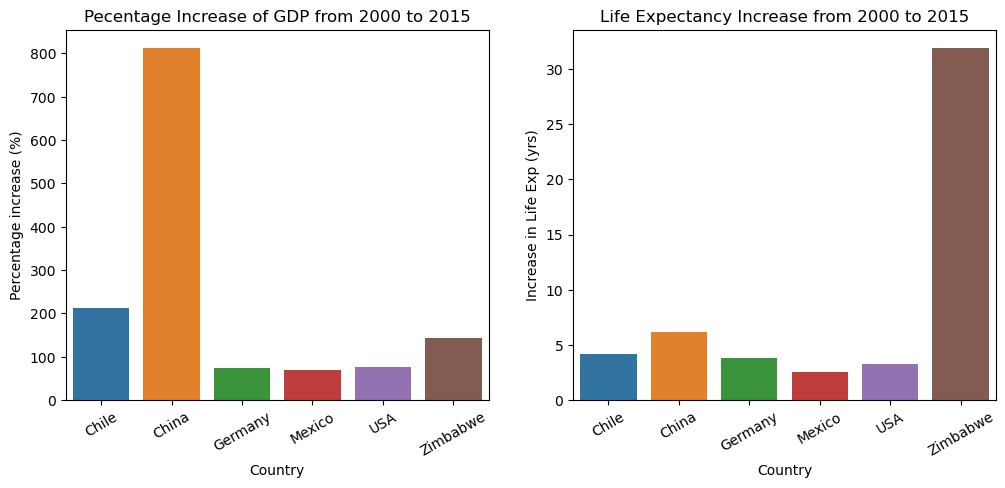

<Figure size 640x480 with 0 Axes>

In [45]:
gdp_delta_rate_all = []
life_exp_delta_rate_all = []
for country in countries:
    gdp_delta = (all_data[all_data['country']==country].gdp.iloc[-1] - all_data[all_data['country']==country].gdp.iloc[0])/all_data[all_data['country']==country].gdp.iloc[0]*100
    gdp_delta_rate_all.append(gdp_delta)
    life_exp_delta = (all_data[all_data['country']==country].life_exp.iloc[-1] - all_data[all_data['country']==country].life_exp.iloc[0])/all_data[all_data['country']==country].life_exp.iloc[0]*100
    life_exp_delta_rate_all.append(life_exp_delta)

# Make the plots
country_labels = ['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']

fig, ax = plt.subplots(1,2, figsize=(12,5))
#plt.figure(figsize=(12,4))
#plt.subplot(1,2,1)
plt.sca(ax[0])
sns.barplot(x=country_labels, y=gdp_delta_rate_all)
plt.xlabel('Country')
plt.ylabel('Percentage increase (%)')
plt.xticks(rotation=30)
plt.title('Pecentage Increase of GDP from 2000 to 2015')
#plt.subplot(1,2,2)
plt.sca(ax[1])
sns.barplot(x=country_labels, y=life_exp_delta_rate_all)
plt.xlabel('Country')
plt.ylabel('Increase in Life Exp (yrs)')
plt.xticks(rotation=30)
plt.title('Life Expectancy Increase from 2000 to 2015')
plt.subplots_adjust(top=0.85)
#fig.suptitle('Figure 2', fontsize=20)
plt.savefig('comparison_gdp_le_growth.png', bbox_inches='tight')
plt.show()
plt.clf()

# Conclusions
Now that we've explored the data, we can pretty easily draw some conclusions about trends we are seeing. 

1. Basic trends show that GDP and life expectancy have a positive correlation. 3 pieces of evidence point us towards this conclusion. 
    1. A general trend in all countries show that when GDP is increasing, so is life expectancy, and vice versa. 
    1. Zimbabwe shows a sustained and consistent decrease in both life expectancy and GDP in the first 5 years of data, however GDP shows a longer sustained drought while life expectancy starts to turn upwards. Exploration of this trend is performed by Murwirapachena and Mlambo in their paper from 2015 and opines that a period of political instability, widespread drought, and the effects of HIV and AIDS on the health of Zimbabwe's citizens. Interactions between the two indicators are highly complex, but the data shows that there is a realtionship
    1. Mexico takes a substantial hit to GDP in during the global financial crisis of 2009. There are other countries that see this effect (USA notably), but Mexico sustains a much larger impact to overall GDP, which is reflected in as a decrease in life expectancy in the time following the crisis. xxx posits that this is due to the increase in homicide rates, and breaks the data down futher to reveal that decreasing trends among men (linked to homicide rates) eclipse the gains made by women in the life expectancy indicator. 
1. Increasing GDP and Life expectancy trends. It's not very outrageous to suspect that these trends will both increase over time, but all 6 countries exhibited a positive increase in both GDP and life expectancy in the span of 15 years. What is most notable are the following two changes: 
    1. China's GDP change was far and away the largest change over the period of interest, coming in at an 8-fold increase in GDP in 15 years, as reported by the data. It should be noted however that the data does not take into account the rate of inflation over that time period. However, since all the countries' GDP are reported in USD, inflation is essentially baselined into the data when comparing across countries. 
    1. Zimbabwe's life expectancy increase was the largest by a substantial margin, logging a 30% increase over the timespan of interest. However, a look at the larger data set of life expectancy analyzed in xxx paper, shows that this marked increase is largely a recuperation from a sustained decrease which started in the 1980s, bottomed out in 2002, and then started to rise again in the years after. 

# Bibiliography
https://www.healthaffairs.org/doi/10.1377/hlthaff.2015.0068
Zimbabwe - https://clutejournals.com/index.php/IBER/article/download/9207/9233/35456
GDP Deflator: https://fred.stlouisfed.org/series/GDPDEF
Mexico - https://www.healthaffairs.org/doi/10.1377/hlthaff.2015.0068
Life expectancy data - https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years)

